<a href="https://colab.research.google.com/github/fatemeh-ict/image_processing/blob/main/car_plate_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import imutils

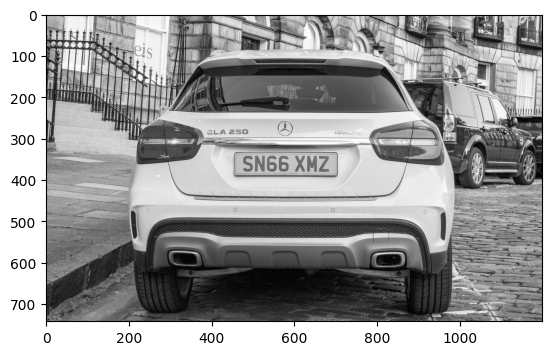

In [9]:
car_img=cv.imread('/content/Car_plate_en2.jpg')
car_img_gray = cv.cvtColor(car_img, cv.COLOR_BGR2GRAY)
plt.imshow(cv.cvtColor(car_img_gray,cv.COLOR_BGR2RGB))
plt.show()

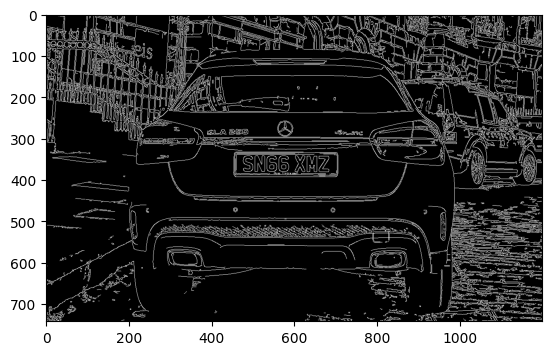

In [15]:
#blurimge
bilateral_filtered=cv.bilateralFilter(car_img_gray,31,19,19)
#canny
edges=cv.Canny(bilateral_filtered,90,200)
plt.imshow(cv.cvtColor(edges,cv.COLOR_BGR2RGB))

In [16]:
contours = cv.findContours(edges.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours_refined = imutils.grab_contours(contours)
contours_sorted = sorted(contours_refined, key=cv.contourArea, reverse=True)[:4]

In [17]:
for contour in contours_sorted:
       contour_approx = cv.approxPolyDP(contour, 20, True)
       if len(contour_approx) == 4:
            plate_location = contour_approx
            break

In [18]:
plate_location

array([[[455, 336]],

       [[458, 393]],

       [[706, 385]],

       [[702, 334]]], dtype=int32)

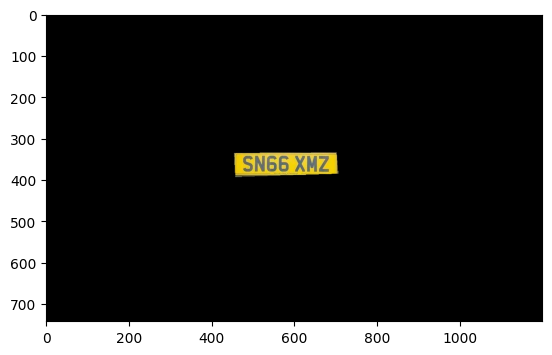

In [19]:
plate_mask0=np.zeros(car_img_gray.shape,np.uint8)
plate_mask=cv.drawContours(plate_mask0,[contour_approx],0,255,-1)
plate_img=cv.bitwise_and(car_img,car_img,mask=plate_mask)
plt.imshow(cv.cvtColor(plate_img,cv.COLOR_BGR2RGB))